In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [0]:
# Building the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Training the model

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.9146 - val_loss: 0.1481 - val_accuracy: 0.9563
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1436 - accuracy: 0.9571 - val_loss: 0.1003 - val_accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9674 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9723 - val_loss: 0.0769 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0773 - accuracy: 0.9752 - val_loss: 0.0761 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.0733 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9811 - val_loss: 0.0790 - val_accuracy:

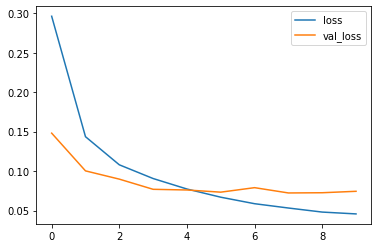

In [6]:
# Plotting loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

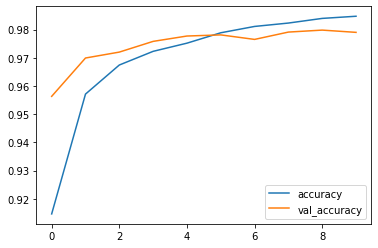

In [7]:
# Plotting accuracy per iteration

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [8]:
# Evaluating the model

print(model.evaluate(X_test, y_test))

313/313 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9790
[0.07442308217287064, 0.9789999723434448]


Confusion matrix, without normalization
[[ 966    0    1    0    0    2    7    1    2    1]
 [   0 1126    3    1    0    0    2    1    2    0]
 [   2    1 1007    8    2    0    2    7    3    0]
 [   0    0    2  989    0   11    0    6    2    0]
 [   0    0    4    0  965    0    4    2    2    5]
 [   2    0    0    4    0  877    4    1    3    1]
 [   3    3    0    1    4    4  942    0    1    0]
 [   1    5   10    2    0    0    0 1004    0    6]
 [   1    1    4    6    3    4    1   10  941    3]
 [   0    3    0   11    6    3    1   10    2  973]]


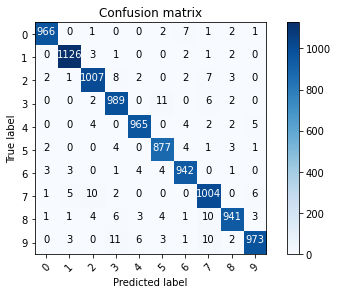

In [9]:
# Plotting confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.0
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

pred_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 6 Predicted label: 5')

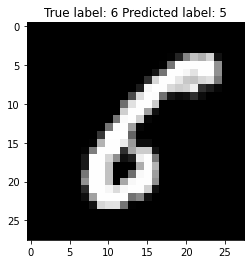

In [10]:
# Missclassified examples

missclassified_idx = np.where(pred_test != y_test)[0]
#np.where returns the index
i = np.random.choice(missclassified_idx)
# np.random.choice picks a random index from missclassified_idx
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i], pred_test[i]))
#print(type(missclassified_idx))
#print(missclassified_idx)